# 我們使用最基礎的 Gradient Descent 方法來找到y=f(x)=Wx+b 當中的 W 和 b , 用來預測 PokenMon 升級後的 CP 值
* 主要的學習教材為台大電機系李弘毅教授的教材 : http://speech.ee.ntu.edu.tw/~tlkagk/courses/ML_2017/Lecture/Linear%20Regression.mp4
* 這問題可以視為 Regression 問題 
* Gradient Descent 的推導會使用到基礎的微分觀念，不了解的話可以參考 : http://www.amath.nchu.edu.tw/~tdoc/4_2.htm
* 實驗資料可以從這裡下載 : https://www.openintro.org/stat/data/?data=pokemon

## 直觀推導方式如下:
* $\hat y 為 Traing Data 當的答案，也就是範例中的 newcp $
* $ x 為 cp 值，而我們要找到一個 f(x) 能準確預測 newcp,故令 y=f(x)=w*x+b $
* 先定義 Lose Function :  $L= (\hat y-f(x))^2 => L(w,b) = (\hat y - (b+w*x))^2 $  
* 我們想要將 Lose 值降到最低，直觀的想法是找出 w,b 對於 Lose Function 的變化影響，如果值變化是往變大的方向我們就減上變化量，更數學的說就是看 w,b 的微小的變化對於 Lose 值的變化方向，然後進行反方向的更新。
* 使用泰勒展開式來進行 Gradient Descent 的推導 : http://speech.ee.ntu.edu.tw/~tlkagk/courses/ML_2017/Lecture/Gradient%20Descent.pdf
* 基於上述直觀的想法，我們對 Lose Function 分別對 w,b 作偏微分，再將此偏微分的結果用來減掉原來的 w,b

## 最終推導的結果如下圖
<img align="left" width="30%" src="./imgs/GradientDescent.png" />

## 我們先取前 50 筆資料，作為實驗素材

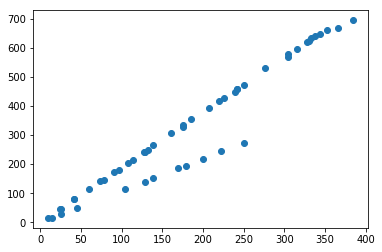

In [1]:
import numpy as np

import pandas as pd

pd = pd.read_csv("./pokemon.csv")
newcp = np.array(pd['cp_new'])
cp = np.array(pd['cp'])

cp = cp[:50]
newcp = newcp[:50]

import matplotlib.pyplot as plt
# plt.plot(newcp,cp)
plt.scatter(cp, newcp)
# plt.ylabel('some numbers')
plt.show()

## 實作 Gradient Descent 的公式
* 這裡有作一點變形，使用的方法為 Stochastic Gradient Descent
* 用比較白話的說就是，並不是拿所有的 Training Data 的 Lose Value 和來算 Gradient ，而是針對每一個 X 就算一次並進行 Gradient Descent 的 update
* 除了使用 Stochastic Gradient Descent 方法之中，還使用了 Regularization 的技巧，避免 w 值過大，造成 f(x) 不夠平滑。

In [4]:
w = 1
b = 1
n = len(cp)
r= 0.000001
for i in range(100000):
    dw = 0 
    db = 0
    error = 0
    for x , y in zip(cp,newcp):
        
        # 加上 2*w 是考量到 Regularization
        dw = -2*x*(y- (w*x+b)) + 2*w
        db = -2*(y- (w*x+b))
    #     print dw,db
        y_head = w*x + b

        w = w - dw*r 
        b = b - db*r

        error  +=(y_head-y)*(y_head-y)
    if i % 10000 ==0 :
        print("w={:0.3f}, b={:0.3f}, error={:0.3f} ".format(w,b,error/n))

w=1.539, b=1.001, error=6332.680 


w=1.575, b=-5.644, error=2685.881 


w=1.599, b=-10.760, error=2640.439 


w=1.617, b=-14.697, error=2615.010 


w=1.631, b=-17.728, error=2601.093 


w=1.642, b=-20.062, error=2593.734 


w=1.651, b=-21.858, error=2590.055 


w=1.657, b=-23.240, error=2588.401 


w=1.662, b=-24.304, error=2587.825 


w=1.666, b=-25.124, error=2587.795 


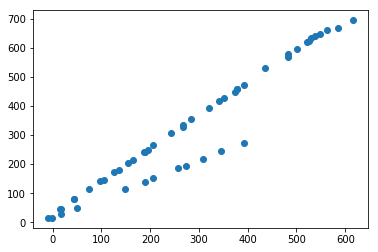

In [8]:
y_head = []
for x in cp :
    predict = w*x +b
    y_head.append(predict)
    
plt.scatter(y_head, newcp)
plt.show()